In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, auc,classification_report
from imblearn.over_sampling import SMOTE

Understanding The Data

In [4]:
# Loading the data from excel
df=pd.read_excel("/content/GR4_Logistic Regression.xlsx")
df.head(10) # Displaying the first 10 rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,5,74.25,2,84,37.0,1599083333,0.000000,0.006579,0.000000e+00,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
1,0,0,0,0,9.0,102.5,0.000000,0.022222,0.000000e+00,0.0,Mar,2,2,1,3,Returning_Visitor,False,False
2,0,0,0,0,16.0,2337,0.000000,0.013333,1.776267e+09,0.0,Mar,2,2,1,1,Returning_Visitor,False,True
3,0,0,0,0,19.0,1883.5,0.010526,0.021053,0.000000e+00,0.0,Mar,2,2,1,3,Returning_Visitor,False,False
4,2,32,0,0,50.0,1245.3,0.004000,0.020667,7.146261e+09,0.0,Mar,2,2,7,9,Returning_Visitor,True,False
5,6,6668333333,0,0,22.0,1674583333,0.000000,0.014667,0.000000e+00,0.0,Mar,2,2,3,2,Returning_Visitor,False,False
6,0,0,0,0,9.0,132,0.011111,0.033333,0.000000e+00,0.0,Mar,4,1,1,3,Returning_Visitor,True,False
7,1,73,1,740,50.0,1434255128,0.000000,0.019231,2.203277e+09,0.0,Mar,2,2,3,2,Returning_Visitor,True,False
8,2,154,0,0,18.0,367.25,0.005263,0.044211,0.000000e+00,0.0,Mar,3,2,2,1,Returning_Visitor,True,False
9,3,4933333333,5,303.25,7.0,148.5,0.000000,0.014082,0.000000e+00,0.0,Mar,3,2,2,2,Returning_Visitor,False,False


In [5]:
df.shape

(2000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           2000 non-null   int64  
 1   Administrative_Duration  2000 non-null   object 
 2   Informational            2000 non-null   int64  
 3   Informational_Duration   2000 non-null   object 
 4   ProductRelated           1999 non-null   float64
 5   ProductRelated_Duration  1999 non-null   object 
 6   BounceRates              1999 non-null   float64
 7   ExitRates                1995 non-null   float64
 8   PageValues               2000 non-null   float64
 9   SpecialDay               2000 non-null   float64
 10  Month                    2000 non-null   object 
 11  OperatingSystems         2000 non-null   int64  
 12  Browser                  2000 non-null   int64  
 13  Region                   2000 non-null   int64  
 14  TrafficType             

Data Preprocessing

In [7]:
print(df['Month'].unique())
print(df['VisitorType'].unique()) # Returns an array with all of the unique values in the column

['Mar' 'Dec' 'Nov' 'May']
['Returning_Visitor' 'New_Visitor' 'Other']


In [8]:
month_mapping = { 'Mar': 3,'May': 5,'Nov': 11, 'Dec': 12}
df['Month'] = df['Month'].map(month_mapping)

VisitorType_mapping = {'Returning_Visitor': 1, 'New_Visitor': 2, 'Other': 3 }
df['VisitorType'] = df['VisitorType'].map(VisitorType_mapping)

In [9]:
columns_to_convert = [
    "Administrative_Duration",
    "Informational_Duration",
    "ProductRelated_Duration",
]
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts non numerical values to NaN

Missing Values

In [10]:
df.isnull().sum() # Check missing values

,0
Administrative,0
Administrative_Duration,30
Informational,0
Informational_Duration,10
ProductRelated,1
ProductRelated_Duration,6
BounceRates,1
ExitRates,5
PageValues,0
SpecialDay,0


<Axes: >

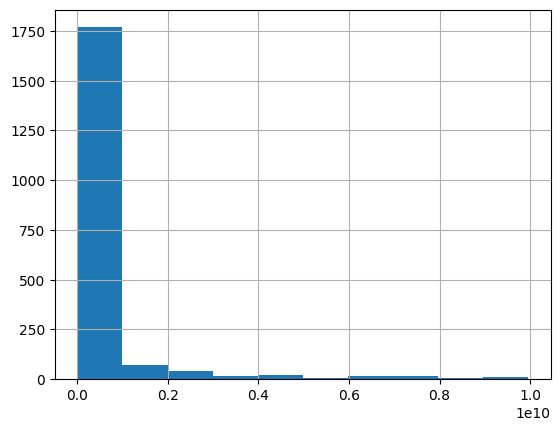

In [11]:
df['Administrative_Duration'].hist()

<Axes: >

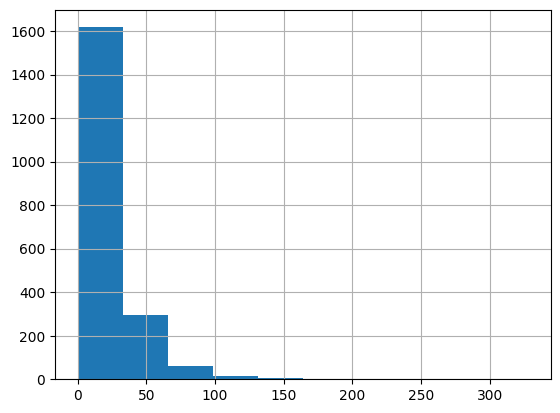

In [12]:
df['ProductRelated'].hist()

<Axes: >

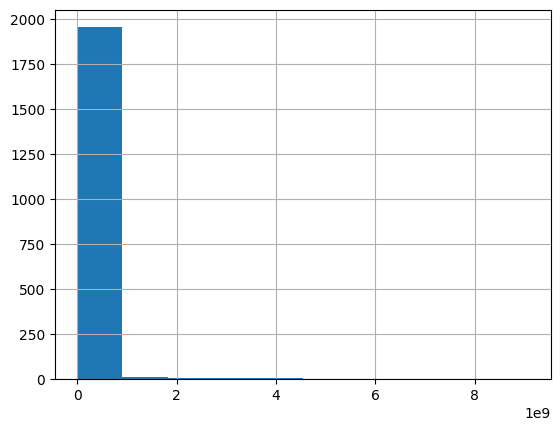

In [13]:
df['Informational_Duration'].hist()

<Axes: >

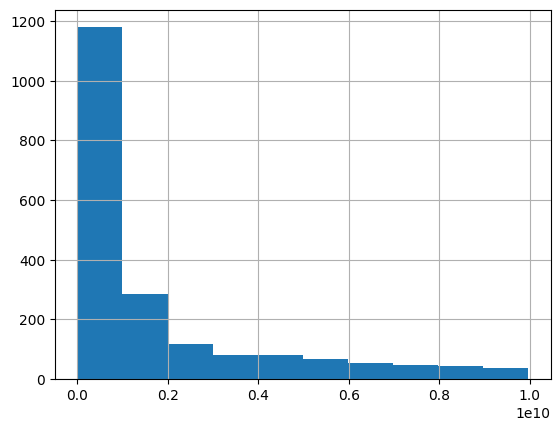

In [14]:
df['ProductRelated_Duration'].hist(bins=10)

<Axes: >

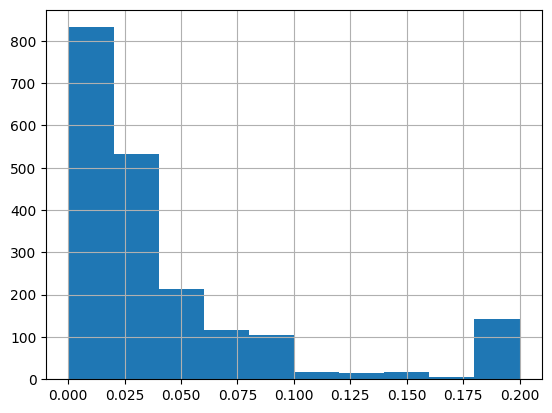

In [15]:
df['ExitRates'].hist()

<Axes: >

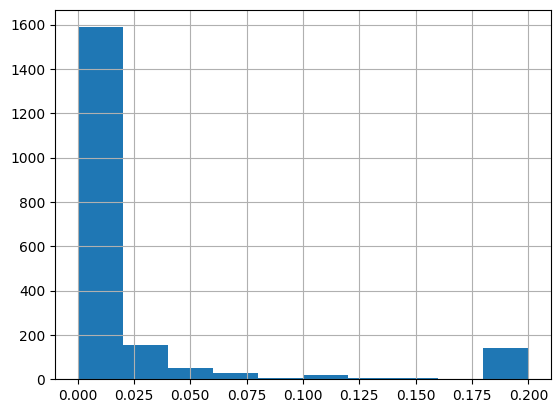

In [16]:
df['BounceRates'].hist()

In [17]:
cols_to_fill = ['Informational_Duration', 'Administrative_Duration',"BounceRates","ExitRates","ProductRelated","ProductRelated_Duration"]

# Filling each column with mean
for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].mean())

In [18]:
ColumnstoInteger=["Administrative_Duration","Informational_Duration","ProductRelated","PageValues","Weekend","ProductRelated_Duration"]
for column in ColumnstoInteger:
    df[column] = df[column].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           2000 non-null   int64  
 1   Administrative_Duration  2000 non-null   int64  
 2   Informational            2000 non-null   int64  
 3   Informational_Duration   2000 non-null   int64  
 4   ProductRelated           2000 non-null   int64  
 5   ProductRelated_Duration  2000 non-null   int64  
 6   BounceRates              2000 non-null   float64
 7   ExitRates                2000 non-null   float64
 8   PageValues               2000 non-null   int64  
 9   SpecialDay               2000 non-null   float64
 10  Month                    2000 non-null   int64  
 11  OperatingSystems         2000 non-null   int64  
 12  Browser                  2000 non-null   int64  
 13  Region                   2000 non-null   int64  
 14  TrafficType             

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,2000.0,1.902500e+00,2.845354e+00,0.000000,0.000000,0.000,3.000000e+00,2.400000e+01
Administrative_Duration,2000.0,3.822257e+08,1.388714e+09,0.000000,0.000000,0.000,9.925000e+01,9.960588e+09
Informational,2000.0,4.150000e-01,1.173654e+00,0.000000,0.000000,0.000,0.000000e+00,1.400000e+01
Informational_Duration,2000.0,6.707219e+07,5.919006e+08,0.000000,0.000000,0.000,0.000000e+00,9.078333e+09
ProductRelated,2000.0,2.056450e+01,2.438699e+01,0.000000,6.000000,13.000,2.700000e+01,3.280000e+02
ProductRelated_Duration,2000.0,1.575169e+09,2.484048e+09,0.000000,159.750000,1027.500,2.245896e+09,9.965167e+09
BounceRates,2000.0,2.218279e-02,5.208730e-02,0.000000,0.000000,0.000,1.379310e-02,2.000000e-01
ExitRates,2000.0,4.475429e-02,5.187431e-02,0.000176,0.012854,0.025,5.000000e-02,2.000000e-01
PageValues,2000.0,4.985492e+08,1.572665e+09,0.000000,0.000000,0.000,0.000000e+00,9.938399e+09
SpecialDay,2000.0,1.490000e-02,1.012083e-01,0.000000,0.000000,0.000,0.000000e+00,1.000000e+00


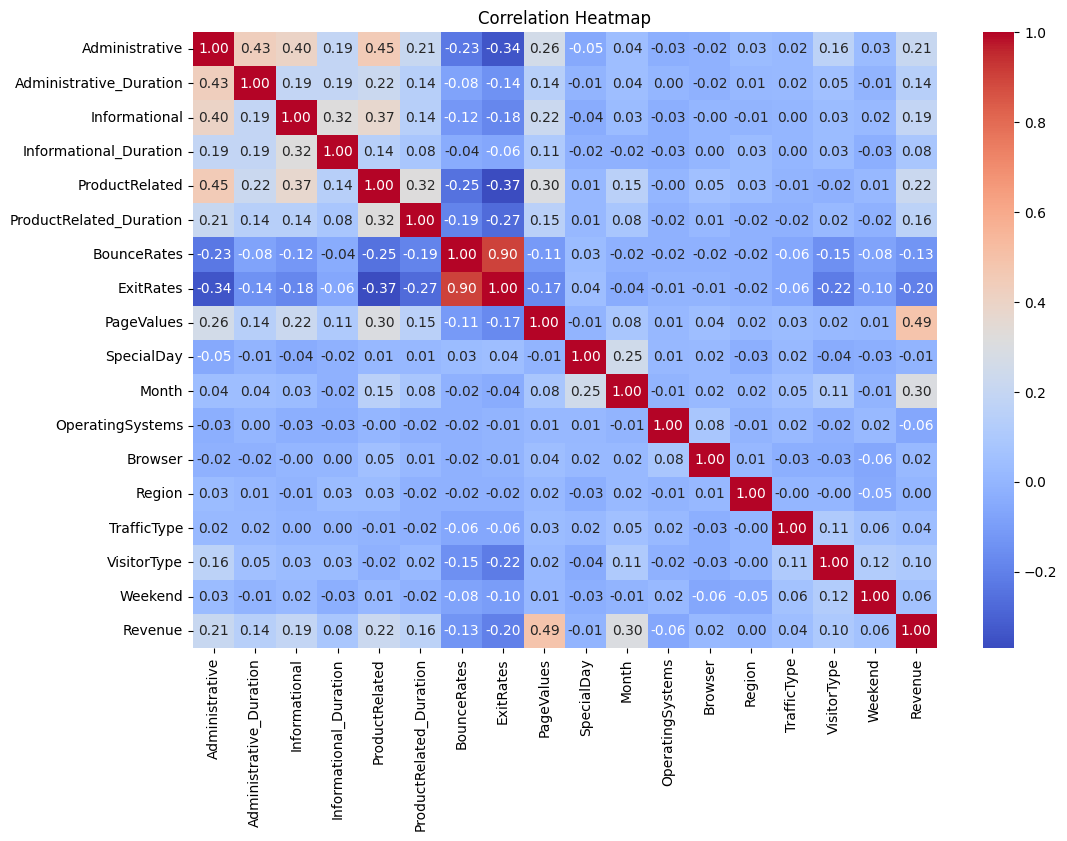

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr().round(2), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='ProductRelated', ylabel='Administrative'>

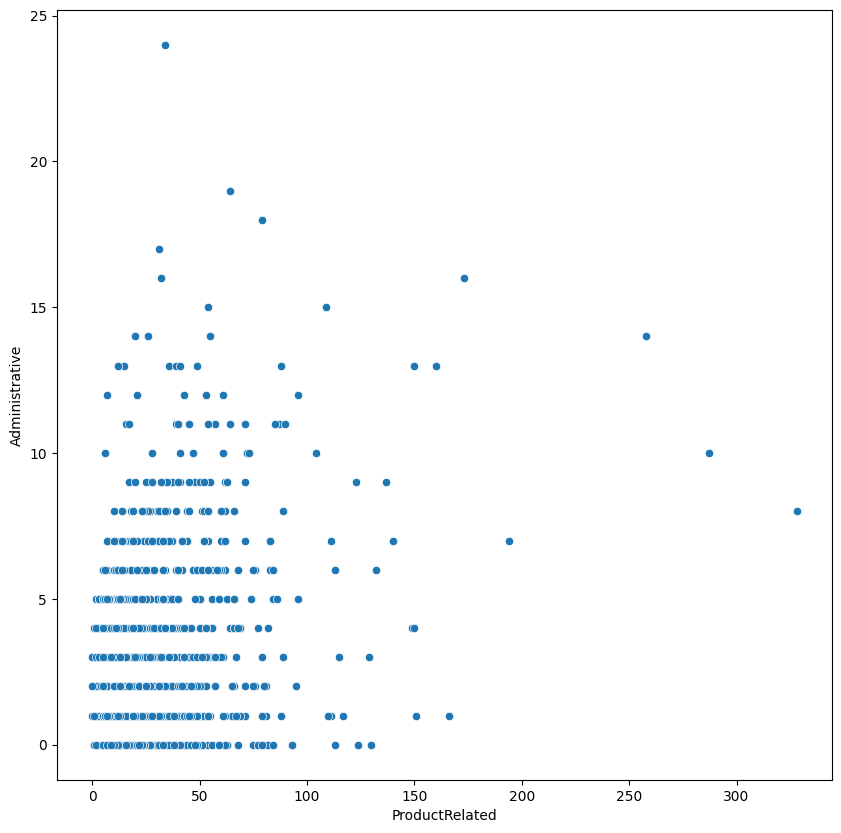

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df ,x="ProductRelated" , y="Administrative")

OUTLIER ANALYSIS

In [23]:
for column in df.columns:
    print(f"Value counts for column: {column}")
    print(df[column].value_counts().sort_values())  #sorting
    print("-"*30 )

Value counts for column: Administrative
Administrative
24       1
17       1
18       1
19       1
15       2
16       2
14       4
12       6
13       9
10      10
11      12
9       29
8       31
7       44
6       65
5       84
4      120
3      160
2      200
1      201
0     1017
Name: count, dtype: int64
------------------------------
Value counts for column: Administrative_Duration
Administrative_Duration
2269545455       1
4658333333       1
9764285714       1
9761111111       1
9933333333       1
              ... 
47              10
7               12
14              14
382225690       30
0             1041
Name: count, Length: 475, dtype: int64
------------------------------
Value counts for column: Informational
Informational
14       1
12       1
9        1
10       1
8        2
7        4
5       11
6       16
4       27
3       55
2       79
1      159
0     1643
Name: count, dtype: int64
------------------------------
Value counts for column: Informational_Duration
Info

In [24]:
numeric_columns = [df.select_dtypes(include=['number']).columns]

# Calculating Z score and detecting outliers
threshold = 5  # Outlier threshold, usually taken as 3
for column in numeric_columns:
    # Calculation of Z score
    z_scores = zscore(df[column])

    # Detecting outliers
    outliers = df[abs(z_scores) > threshold]

    # Printing outliers
    print(f"{column} |total outlier count in column: {outliers.shape[0]}")

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object') |total outlier count in column: 2000


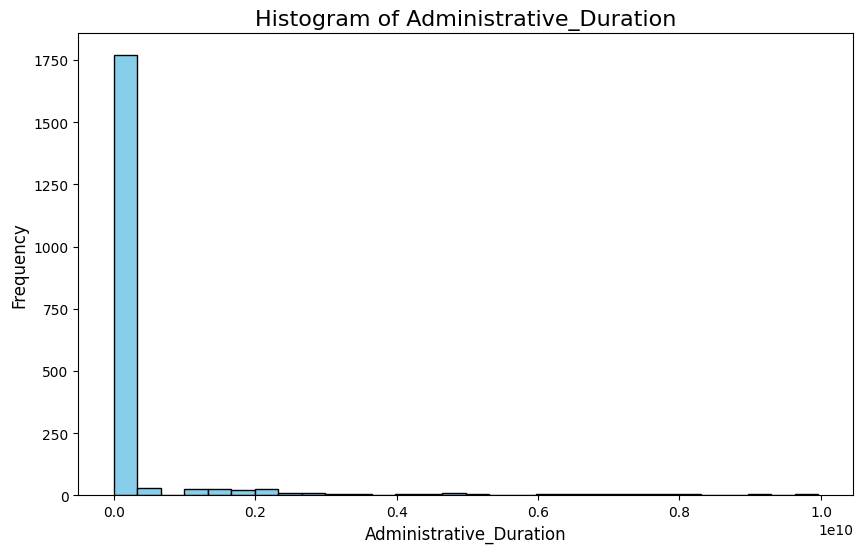

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['Administrative_Duration'], bins=30, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Administrative_Duration', fontsize=16)
plt.xlabel('Administrative_Duration', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

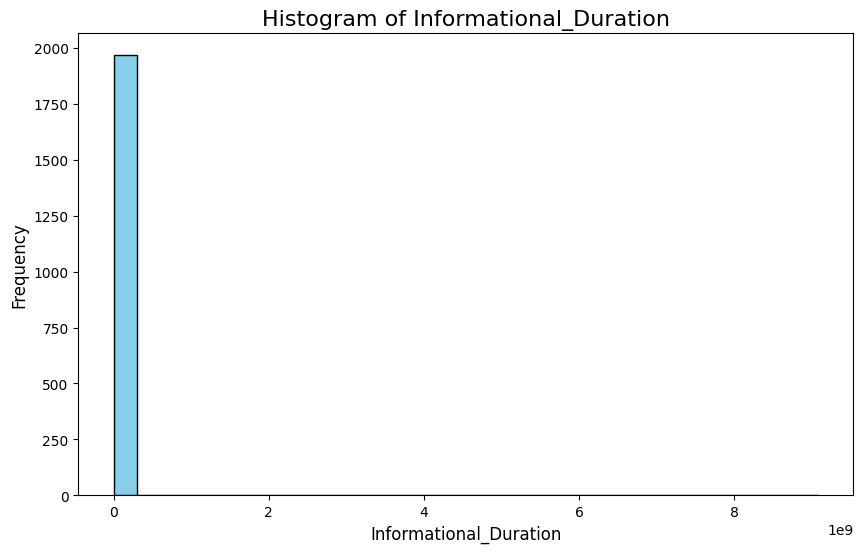

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df['Informational_Duration'], bins=30, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Informational_Duration', fontsize=16)
plt.xlabel('Informational_Duration', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

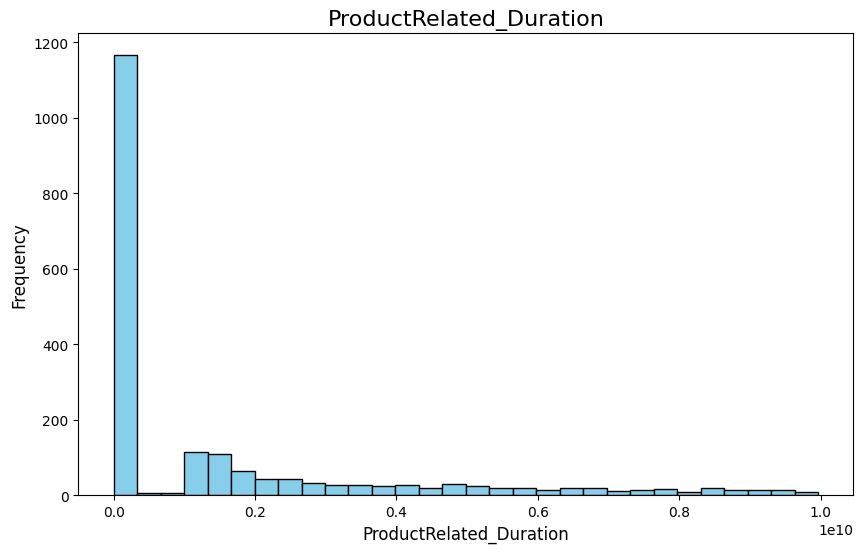

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df['ProductRelated_Duration'], bins=30, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('ProductRelated_Duration', fontsize=16)
plt.xlabel('ProductRelated_Duration', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [28]:
ColumnsOutliers = ['Administrative_Duration', 'Informational_Duration',"ProductRelated_Duration"]
cleaned_data = df.copy()
for column in ColumnsOutliers:
    z_scores = zscore(cleaned_data[column])
    cleaned_data = cleaned_data[(np.abs(z_scores) < 5)]

Standardizing

In [29]:
# Standardize the features (normalize data)
scaler = StandardScaler()

# Determining numerical columns
numerical_features = numerical_features = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues'
]

# Scaling numerical columns
cleaned_data_scaled= cleaned_data.copy()
cleaned_data_scaled[numerical_features] = scaler.fit_transform(cleaned_data[numerical_features])

In [30]:
#Separation of target variables and features
X= cleaned_data_scaled.drop('Revenue', axis=1)
y= cleaned_data_scaled['Revenue']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Model

Accuracy: 93.35%
Model Coefficients: [[ 0.04534092  0.02199371  0.17364767  0.01554906 -0.18278719  0.21904435
  -0.46362469 -1.76971742  0.77419945 -0.48493335  0.62121641 -0.47413907
   0.08285878 -0.0219557   0.00420097  0.20592987  0.43164017]]
Model Intercept: [-4.85428308]


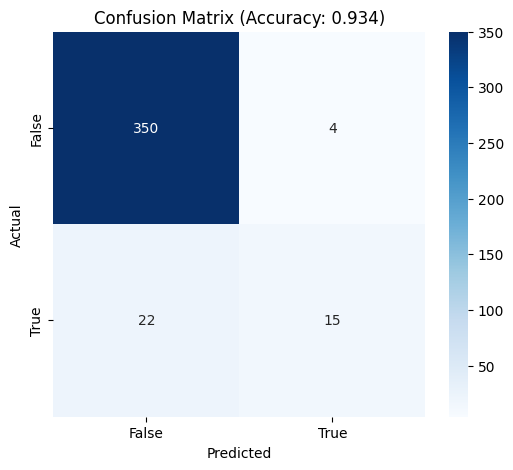

In [31]:
model = LogisticRegression()

# Training the model on the data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Coefficients and intercept of model
print('Model Coefficients:', model.coef_)
print('Model Intercept:', model.intercept_)

# Confusion matrix visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
cleaned_data["Revenue"].value_counts()

,count
Revenue,
False,1742
True,213


Smote Method

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy after SMOTE: 85.65%

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.88      0.87       373
        True       0.86      0.83      0.84       324

    accuracy                           0.86       697
   macro avg       0.86      0.85      0.86       697
weighted avg       0.86      0.86      0.86       697



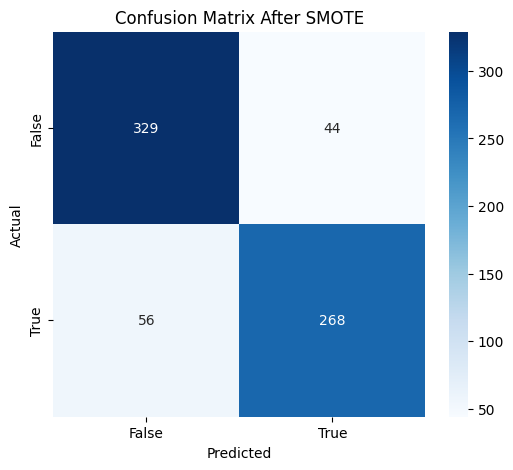

In [33]:
# Apply SMOTE for data augmentation
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, y_smote, test_size=0.20, random_state=42
)

# Train the logistic regression model
model_smote = LogisticRegression(random_state=42, max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = model_smote.predict(X_test_smote)

# Evaluate model performance
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
classification_report_smote = classification_report(y_test_smote, y_pred_smote)
cm_smote = confusion_matrix(y_test_smote, y_pred_smote)

# Print results
print(f"Accuracy after SMOTE: {accuracy_smote * 100:.2f}%")
print("\nClassification Report:")
print(classification_report_smote)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("Confusion Matrix After SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



**After the presentation, we tried standardization to scale the data and our accuracy rate improved.**

# Yeni Bölüm

Accuracy: 93.61%
Model Coefficients: [[-2.73114871e-01  5.67233555e-01 -1.83975490e-02  1.27643002e+00
  -1.74857784e+00  3.76150025e-01 -1.22699823e-01 -1.37506509e-01
   4.43316981e+00 -9.91489626e-01  6.00352762e-01 -6.09432749e-01
   5.18860836e-02  2.62779207e-03 -1.69060475e-02  4.39379278e-01
   5.20073505e-01]]
Model Intercept: [-4.95686405]


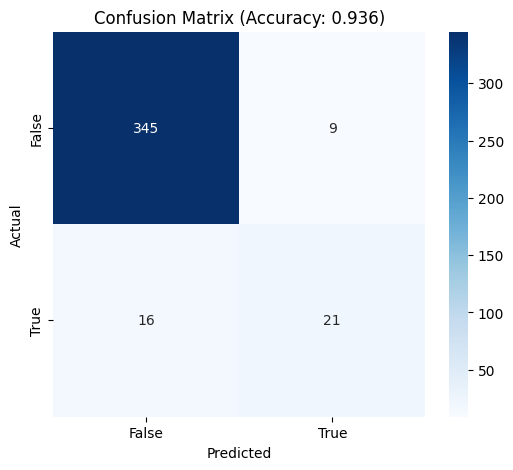

In [34]:
# Normalize the features (scale data)
scaler = Normalizer()

# Determining numerical columns
numerical_features = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues'
]

# Normalizing numerical columns
cleaned_data_normalized = cleaned_data.copy()
cleaned_data_normalized[numerical_features] = scaler.fit_transform(cleaned_data[numerical_features])

# Separation of target variables and features
X = cleaned_data_normalized.drop('Revenue', axis=1)
y = cleaned_data_normalized['Revenue']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Coefficients and intercept of model
print('Model Coefficients:', model.coef_)
print('Model Intercept:', model.intercept_)

# Confusion matrix visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy after SMOTE: 93.54%

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94       373
        True       0.96      0.90      0.93       324

    accuracy                           0.94       697
   macro avg       0.94      0.93      0.93       697
weighted avg       0.94      0.94      0.94       697



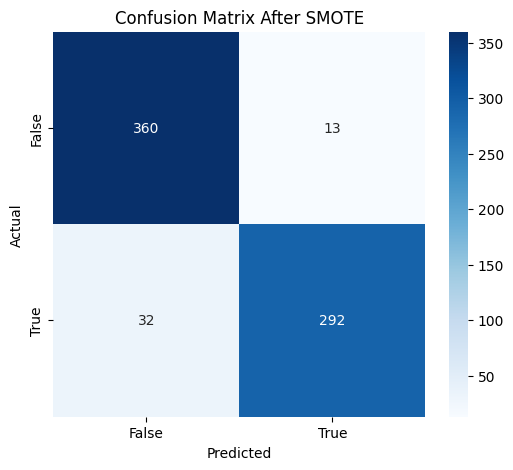

In [35]:
# Apply SMOTE for data augmentation
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.20, random_state=42
)

# Train the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print evaluation results
print(f"Accuracy after SMOTE: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(report)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("Confusion Matrix After SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()